# 校园管理和服务模型 
## 要点   
1. 确定标准，获取捕捉单个学生的早中晚餐以及洗澡时间  
2. 通过进行可视化分析


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os


In [29]:
# 分类需要处理的数据 按赵交易地点进行分类 对其中吃饭（1） 洗浴的数据进行主要的分析（2）
Tupeat = (243000461,243000076,243000243,243000661,243000089,243000084,243000401,243000441,243000060,243000087,243000161,243000601,243000078,243000242,243000361,243000061,243000022)
SetEat = set(Tupeat)
Tupwash = (243000064,243000010,243000703)
SetWash = set(Tupwash)
TupGym= (243000302,243000301)
SetGym = set(TupGym)
TupWater = (243000065,243000101,243000701,243000422,243000074,243000102)
SetWater = set(TupWater)
# 数据预处理
dataToDeal = pd.read_csv('ykt_jyrz_forQuestionTwo.csv',skiprows=0)
dA = dataToDeal
dA['JYSJ'] = pd.to_datetime(dA['JYSJ'])
dA['JYSJ'] = dA['JYSJ'].dt.time
dA = dA.values


          XH  JYJE        JYRQ                JYSJ       SHDM
0  201415178    84  2019-04-27 2019-04-27 15:24:38  243000010
1  201415178   350  2019-04-27 2019-04-27 15:13:16  243000010
2  201415178   147  2019-04-23 2019-04-23 19:09:11  243000010
3  201415178    35  2019-04-23 2019-04-23 19:07:14  243000010
4  201415178   476  2019-04-23 2019-04-23 18:52:53  243000010
          XH  JYJE        JYRQ      JYSJ       SHDM
0  201415178    84  2019-04-27  15:24:38  243000010
1  201415178   350  2019-04-27  15:13:16  243000010
2  201415178   147  2019-04-23  19:09:11  243000010
3  201415178    35  2019-04-23  19:07:14  243000010
4  201415178   476  2019-04-23  18:52:53  243000010


In [34]:
for row in dA:
    if row[4] in SetEat:
        row[4] = 1
    elif row[4] in SetWash:
        row[4] = 2
    elif row[4] in SetGym:
        row[4] = 3
    elif row[4] in SetWater:
        row[4] = 4
    else:
        row[4] = 0
# print(dA)


[['201415178' 84 '2019-04-27' datetime.time(15, 24, 38) 2]
 ['201415178' 350 '2019-04-27' datetime.time(15, 13, 16) 2]
 ['201415178' 147 '2019-04-23' datetime.time(19, 9, 11) 2]
 ...
 ['201840031' 7 '2019-04-23' datetime.time(20, 11, 9) 2]
 ['201840031' 217 '2019-04-23' datetime.time(20, 4, 11) 2]
 ['201840031' 175 '2019-04-23' datetime.time(19, 57, 20) 2]]


In [47]:
dA = pd.DataFrame(dA)
dA = dA[~dA[4].isin([0])]
dA = dA[~dA[4].isin([3])]
dA = dA[~dA[4].isin([4])]
dA = dA.values
dA = pd.DataFrame(dA)
# print(dA)


                0     1           2                3  4
0       201415178    84  2019-04-27         15:24:38  2
1       201415178   350  2019-04-27         15:13:16  2
2       201415178   147  2019-04-23         19:09:11  2
3       201415178    35  2019-04-23         19:07:14  2
4       201415178   476  2019-04-23         18:52:53  2
5       201502016  5000  2019-04-22         14:37:53  1
6       201502016   850  2019-04-29         15:28:17  1
7       201735120   500  2019-04-28  09:07:16.056000  1
8       201735120  1050  2019-04-26         17:47:33  1
9       201735120   350  2019-04-24         16:53:10  1
10      201735120   800  2019-04-22         19:40:10  1
11      201755050  3000  2019-04-26         19:45:53  1
12      201755050    98  2019-04-26         20:05:41  2
13      201755050   476  2019-04-26         19:49:59  2
14      201638076     7  2019-04-27         18:59:54  2
15      201638076   133  2019-04-27         18:56:07  2
16      201638076    84  2019-04-27         18:5

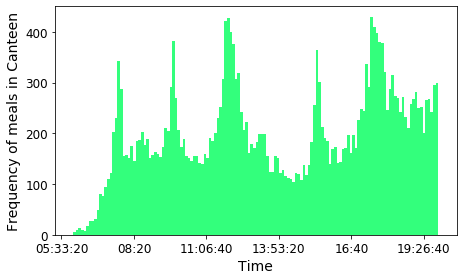

In [73]:
# 提取出吃饭的频次 计算出吃饭的频次分布图
dOnlyEat = dA[dA[4].isin([1])]
x = dOnlyEat.loc[:,3]
x = x.values
plt.hist(x,bins=140,range=(datetime.time(6,0,0),datetime.time(20,0,0))\
        ,weights=None,cumulative=None,color='#33ff7c')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Frequency of meals in Canteen',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(7.2, 4.2)
print()
fig.savefig(os.getcwd()+'\pictureEat.png', dpi=300)
plt.show()


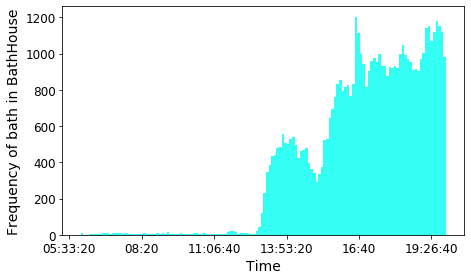

In [74]:
# 提取出洗浴的频次 计算出洗浴的频次分布图
dOnlyShow = dA[dA[4].isin([2])]
x = dOnlyShow.loc[:,3]
x = x.values
plt.hist(x,bins=140,range=(datetime.time(6,0,0),datetime.time(20,0,0))\
        ,weights=None,cumulative=None,color='#33fff4')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Frequency of bath in BathHouse',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(7.2, 4.2)
print()
fig.savefig(os.getcwd()+'\pictureBath.png', dpi=300)
plt.show()


以上是校园管理和服务模型的一方面体现，下面一部分来实现对学生吃饭习惯的分析和预警  
由于给定的数据对于单个人的，样本量较少，因此此处的代码作为一个通用代码，数据越全面分析越准确


In [82]:
# print(dOnlyEat)
temp = dOnlyEat.drop_duplicates(0)
temp = temp.loc[:,0]
temp = temp.values
temp = temp.tolist()
habitEatingAnalysis =  dict.fromkeys(temp,0)


{'201502016': 0, '201735120': 0, '201755050': 0, '201708085': 0, '201508111': 0, '201644029': 0, '201656044': 0, '201704078': 0, '201788016': 0, '201726215': 0, '201747014': 0, '201651017': 0, '201756146': 0, '201508077': 0, '201515019': 0, '201746050': 0, '201705122': 0, '201600084': 0, '201515124': 0, '201696045': 0, '201724095': 0, '201737045': 0, '201508051': 0, '201614099': 0, '201629058': 0, '201725045': 0, '201774062': 0, '201505049': 0, '201637019': 0, '201600002': 0, '201754073': 0, '201720095': 0, '201664062': 0, '201716116': 0, '201745018': 0, '201679154': 0, '201716061': 0, '201728058': 0, '201668056': 0, '201600051': 0, '201534215': 0, '201674063': 0, '201744057': 0, '201546018': 0, '201737025': 0, '201618079': 0, '201734050': 0, '201737034': 0, '201654029': 0, '201649051': 0, '201764114': 0, '201696046': 0, '201734064': 0, '201675016': 0, '201738028': 0, '201628028': 0, '201625037': 0, '201774012': 0, '201794110': 0, '201744061': 0, '201536152': 0, '201765010': 0, '201788

In [92]:
dOnlyEatMatrix = dOnlyEat.values
# print(dOnlyEatMatrix)
count = 0
name = dOnlyEatMatrix[0][0]
ratio = 0.0
for row in dOnlyEatMatrix:
    if row[0] == name:
        count += 1
        if (row[3] >= datetime.time(6,0,0) and row[3] <= datetime.time(8,30,0)) or (row[3] >= datetime.time(11,0,0) and row[3] <= datetime.time(14,0,0)) or (row[3] >= datetime.time(16,30,0) and row[3] <= datetime.time(19,00,0)):
            habitEatingAnalysis[row[0]] += 1
    else:
        ratio = habitEatingAnalysis[name]/count
        habitEatingAnalysis[name] = ratio
        name = row[0]
        count = 1
        if (row[3] >= datetime.time(6,0,0) and row[3] <= datetime.time(8,30,0)) or (row[3] >= datetime.time(11,0,0) and row[3] <= datetime.time(14,0,0)) or (row[3] >= datetime.time(16,30,0) and row[3] <= datetime.time(19,00,0)):
            habitEatingAnalysis[row[0]] += 1
ratio = habitEatingAnalysis[name]/count
habitEatingAnalysis[name] = ratio
print(habitEatingAnalysis)


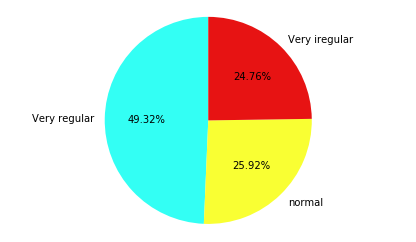

In [95]:
#作图统计规律人数
x = [0,0,0]
for i in habitEatingAnalysis:
    if habitEatingAnalysis[i] >= 0 and habitEatingAnalysis[i] < 0.4:
        x[0] += 1
    elif habitEatingAnalysis[i] >= 0.4 and habitEatingAnalysis[i] < 0.7:
        x[1] += 1
    elif habitEatingAnalysis[i] >= 0.7 and habitEatingAnalysis[i] <= 1:
        x[2] += 1
plt.figure(figsize=(6,9))
labels = [u'Very regular',u'normal',u'Very iregular']
sizes = x
colors = ['#33fff4','#f9ff33','#e71313']
explode = (0,0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7.2, 4.2)
print()
fig.savefig(os.getcwd()+'\pictureRegular.png', dpi=300)
plt.show()